# 🎧 Predicting Music Popularity from Audio Features  
## Notebook 05 — Audio-Driven Popularity Modeling
Evaluating how much acoustic characteristics alone can explain and predict track success.

## 1. Set up

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet("../data/processed/base_aligned.parquet")
df.head()

,apple_track_id,apple_artist_id,track_name,artist_name,genre,country,release_date,release_year,release_month,release_ym,...,cover_art_url,bpm,energy,brightness,noisiness,rhythm_strength,artist_followers,artist_popularity,artist_genres,artist_image_url
0,298321904,46087,Music,Erick Sermon,Hip-Hop/Rap,USA,2001-08-27 12:00:00+00:00,2001,8,2001-08,...,https://i.scdn.co/image/ab67616d0000b2737276e4...,99.384014,0.164533,1887.936273,0.080000,2.063508,265997.0,52.0,"['east coast hip hop', 'old school hip hop']",https://i.scdn.co/image/ab6761610000e5ebbefe81...
1,80815173,20044,Music,Madonna,Pop,USA,2000-08-21 07:00:00+00:00,2000,8,2000-08,...,https://i.scdn.co/image/ab67616d0000b2734c8f09...,117.453835,0.181498,2826.828547,0.118955,2.087084,117116492.0,96.0,[],https://i.scdn.co/image/ab6761610000e5eb9e5289...
2,169003415,486597,Don't Stop Believin' (2024 Remaster),Journey,Rock,USA,1981-06-03 07:00:00+00:00,1981,6,1981-06,...,https://i.scdn.co/image/ab67616d0000b27370b5c1...,117.453835,0.093140,2063.243547,0.109971,1.150188,6687304.0,76.0,"['aor', 'classic rock']",https://i.scdn.co/image/ab6761610000e5ebe848df...
3,277635828,156987,I'm Yours,Jason Mraz,Pop,USA,2008-02-12 08:00:00+00:00,2008,2,2008-02,...,https://i.scdn.co/image/ab67616d0000b273125b1a...,151.999081,0.172077,1737.766877,0.061636,1.706438,7337242.0,74.0,"['soft pop', 'acoustic pop']",https://i.scdn.co/image/ab6761610000e5ebc3b370...
4,298429596,46087,Music,Erick Sermon,Hip-Hop/Rap,USA,2001-05-29 07:00:00+00:00,2001,5,2001-05,...,https://i.scdn.co/image/ab67616d0000b2737276e4...,99.384014,0.167033,1868.193043,0.078049,2.053480,265997.0,52.0,"['east coast hip hop', 'old school hip hop']",https://i.scdn.co/image/ab6761610000e5ebbefe81...


In [3]:
df.columns

Index(['apple_track_id', 'apple_artist_id', 'track_name', 'artist_name',
       'genre', 'country', 'release_date', 'release_year', 'release_month',
       'release_ym', 'track_time_ms', 'track_time_min', 'preview_url',
       'advisory_rating', 'track_explicitness', 'apple_collection_id',
       'collection_name', 'spotify_id', 'spotify_artist_id',
       'track_popularity', 'spotify_explicit', 'spotify_release_date',
       'cover_art_url', 'bpm', 'energy', 'brightness', 'noisiness',
       'rhythm_strength', 'artist_followers', 'artist_popularity',
       'artist_genres', 'artist_image_url'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   apple_track_id        10000 non-null  int64              
 1   apple_artist_id       10000 non-null  int64              
 2   track_name            10000 non-null  object             
 3   artist_name           10000 non-null  object             
 4   genre                 10000 non-null  object             
 5   country               10000 non-null  object             
 6   release_date          10000 non-null  datetime64[ns, UTC]
 7   release_year          10000 non-null  int32              
 8   release_month         10000 non-null  int32              
 9   release_ym            10000 non-null  object             
 10  track_time_ms         10000 non-null  int64              
 11  track_time_min        10000 non-null  float64            
 12  previ

In [5]:
df.isna().mean()

apple_track_id          0.0000
apple_artist_id         0.0000
track_name              0.0000
artist_name             0.0000
genre                   0.0000
country                 0.0000
release_date            0.0000
release_year            0.0000
release_month           0.0000
release_ym              0.0000
track_time_ms           0.0000
track_time_min          0.0000
preview_url             0.0000
advisory_rating         0.8488
track_explicitness      0.0000
apple_collection_id     0.0000
collection_name         0.0000
spotify_id              0.0459
spotify_artist_id       0.0459
track_popularity        0.0459
spotify_explicit        0.0459
spotify_release_date    0.0459
cover_art_url           0.0460
bpm                     0.0000
energy                  0.0000
brightness              0.0000
noisiness               0.0000
rhythm_strength         0.0000
artist_followers        0.0459
artist_popularity       0.0459
artist_genres           0.0459
artist_image_url        0.0502
dtype: f

In [6]:
today = pd.Timestamp('2026-01-18', tz='UTC')
df['track_age_days'] = (today - df['release_date']).dt.days
df[['release_date', 'track_age_days']]

,release_date,track_age_days
0,2001-08-27 12:00:00+00:00,8909
1,2000-08-21 07:00:00+00:00,9280
2,1981-06-03 07:00:00+00:00,16299
3,2008-02-12 08:00:00+00:00,6549
4,2001-05-29 07:00:00+00:00,8999
...,...,...
9995,2007-08-14 12:00:00+00:00,6731
9996,2011-02-01 12:00:00+00:00,5464
9997,1973-07-14 07:00:00+00:00,19180
9998,2005-11-15 12:00:00+00:00,7368


In [7]:
df=df.dropna(subset='track_popularity').copy()
df['track_popularity'].isna().mean()

np.float64(0.0)

## 1. Hypotheses
- **H1:** Artist popularity → Track popularity  
- **H2:** Prior artist success (momentum) → Track popularity  
- **H3:** Audio features → Track popularity  
- **H4:** Combined model → strongest explanatory power (audio contribution tested under controls)

## 2. Models (Stepwise / Block Comparison)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

### M1 — Audio-only baseline

In [9]:
X = df[["bpm","energy","brightness","noisiness","rhythm_strength"]]
y = df["track_popularity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print(X_train.shape, X_test.shape)

(7632, 5) (1909, 5)


In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

m1_r2 = r2_score(y_test, y_pred)
print(m1_r2)
m1_mae = mean_absolute_error(y_test, y_pred)
print(m1_mae)

0.012340030723514306
14.331759135381468


- Audio Explains **0.3%** of popularity variance
- on average prediction based on Audio Features is off by ~14 popularity points

> Sound Alone CANNOT predict streaming success

In [11]:
for name, coef in zip(X.columns, lr.coef_):
    print(f"{name}: {coef:.3f}")

bpm: -0.008
energy: -2.660
brightness: 0.003
noisiness: -32.540
rhythm_strength: 5.866


- Noisiness is acting as a strong negative predictor
- Rhythm gives weak positive signal

### M2 — Artist-only model

In [12]:
X = df[['artist_popularity', 'artist_followers']]
y = df['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print(X_train.shape, X_test.shape)

(7632, 2) (1909, 2)


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

m2_r2 = r2_score(y_test, y_pred)
print(m2_r2)
m2_mae = mean_absolute_error(y_test, y_pred)
print(m2_mae)

0.10965982750997849
13.54960309302937


| Model       | R²    | Meaning                     |
| ----------- | ----- | --------------------------- |
| Audio only  | 0.003 | useless, noise level        |
| Artist only | 0.104 | explains ~10% of popularity |

- Popularity is inherited from artist-level exposure, not sonic quality

In [14]:
for name, coef in zip(X.columns, lr.coef_):
    print(f"{name}: {coef:.3f}")

artist_popularity: 0.387
artist_followers: 0.000


### Release features for Momentum Effect
- Add `prev_release_pop` and `prior_release_mean_pop` for release momentum effect and long term momentum effect

In [15]:
release_df = (
    df.groupby(["artist_name","release_date"], observed=True)["track_popularity"]
      .max()
      .reset_index()
      .rename(columns={"track_popularity":"release_max_pop"})
)

In [16]:
release_df = release_df.sort_values(["artist_name","release_date"])

release_df["prev_release_pop"] = (
    release_df.groupby("artist_name")["release_max_pop"]
              .shift(1)
)

release_df["prior_release_mean_pop"] = (
    release_df.groupby("artist_name")["prev_release_pop"]
              .expanding()
              .mean()
              .reset_index(level=0, drop=True)
)

In [17]:
df = df.merge(
    release_df[[
        "artist_name",
        "release_date",
        "prev_release_pop",
        "prior_release_mean_pop"
    ]],
    on=["artist_name","release_date"],
    how="left"
)

In [18]:
df[['prev_release_pop', 'prior_release_mean_pop']].isna().mean()

prev_release_pop          0.282151
prior_release_mean_pop    0.282151
dtype: float64

In [19]:
df.loc[df['artist_name']=='Taylor Swift'].sort_values('release_date').head(15) #Sanity Check

,apple_track_id,apple_artist_id,track_name,artist_name,genre,country,release_date,release_year,release_month,release_ym,...,brightness,noisiness,rhythm_strength,artist_followers,artist_popularity,artist_genres,artist_image_url,track_age_days,prev_release_pop,prior_release_mean_pop
6119,1440936016,159260351,Shake It Off,Taylor Swift,Pop,USA,2014-01-01 12:00:00+00:00,2014,1,2014-01,...,2708.709959,0.120685,1.497114,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,4399,NaN,NaN
7550,1440934248,159260351,...Ready For It?,Taylor Swift,Pop,USA,2017-01-01 12:00:00+00:00,2017,1,2017-01,...,1950.383386,0.059693,1.374872,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,3303,82.0,82.000000
8116,1440934255,159260351,Look What You Made Me Do,Taylor Swift,Pop,USA,2017-08-24 12:00:00+00:00,2017,8,2017-08,...,2765.053172,0.104387,1.770273,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,3068,80.0,81.000000
9484,1440934254,159260351,Delicate,Taylor Swift,Pop,USA,2017-11-10 12:00:00+00:00,2017,11,2017-11,...,1983.680390,0.062456,1.323784,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2990,79.0,80.333333
1037,1468058706,159260351,ME! (feat. Brendon Urie of Panic! At The Disco),Taylor Swift,Pop,USA,2019-04-26 07:00:00+00:00,2019,4,2019-04,...,2687.511098,0.099351,1.395333,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2458,82.0,80.750000
562,1468058704,159260351,You Need To Calm Down,Taylor Swift,Pop,USA,2019-06-14 07:00:00+00:00,2019,6,2019-06,...,2634.413802,0.095412,1.381938,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2409,73.0,79.200000
1398,1468058177,159260351,The Archer,Taylor Swift,Pop,USA,2019-07-23 07:00:00+00:00,2019,7,2019-07,...,1428.268898,0.047357,1.103944,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2370,76.0,78.666667
726,1468058173,159260351,Lover,Taylor Swift,Pop,USA,2019-08-16 07:00:00+00:00,2019,8,2019-08,...,2069.547602,0.095292,1.203585,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2346,75.0,78.142857
1575,1468058176,159260351,The Man,Taylor Swift,Pop,USA,2019-08-23 07:00:00+00:00,2019,8,2019-08,...,2789.156230,0.106105,1.695505,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2339,85.0,79.000000
1574,1468058176,159260351,The Man,Taylor Swift,Pop,USA,2019-08-23 07:00:00+00:00,2019,8,2019-08,...,2789.156230,0.106105,1.695505,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2339,85.0,79.000000


In [20]:
df_model = df.dropna(subset=["prev_release_pop"])
df_model.shape

(6849, 35)

### M3 Artist + Release Momentum Effect

In [21]:
X = df_model[['artist_popularity', 'artist_followers', 'prev_release_pop']]
y = df_model['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print(X_train.shape, X_test.shape)

(5479, 3) (1370, 3)


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

m3_r2 = r2_score(y_test, y_pred)
print(m3_r2)
m3_mae = mean_absolute_error(y_test, y_pred)
print(m3_mae)

0.1748693488139883
12.28437346404213


In [23]:
for name, coef in zip(X.columns, lr.coef_):
    print(f"{name}: {coef:.3f}")

artist_popularity: 0.437
artist_followers: 0.000
prev_release_pop: 0.206


| Model | Features Used | Test R² | MAE |
|------|---------------|---------|------|
| M1 | Audio only | 0.003 | 14.17 |
| M2 | Artist only | 0.104 | 13.34 |
| M3 | Artist + Previous Release Momentum | 0.175 | 12.28 |

### M4 Artist + Long-Term Momentum

In [24]:
X = df_model[['artist_popularity', 'artist_followers', 'prior_release_mean_pop']]
y = df_model['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print(X_train.shape, X_test.shape)

(5479, 3) (1370, 3)


In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

m4_r2 = r2_score(y_test, y_pred)
print(m4_r2)
m4_mae = mean_absolute_error(y_test, y_pred)
print(m4_mae)

0.19719805275021585
12.073604527708207


In [26]:
for name, coef in zip(X.columns, lr.coef_):
    print(f"{name}: {coef:.3f}")

artist_popularity: 0.353
artist_followers: 0.000
prior_release_mean_pop: 0.370


| Model | Features Used | Test R² | MAE |
|------|---------------|---------|------|
| M1 | Audio only | 0.003 | 14.17 |
| M2 | Artist only | 0.104 | 13.34 |
| M3 | Artist + Previous Release Momentum | 0.175 | 12.28 |
| M4 | Artist + Long-Term Release Momentum | 0.197 | 12.07 |

### M5 Artist + Immediate Carryover + Long term Momentum

In [27]:
X = df_model[['artist_popularity', 'artist_followers','prev_release_pop', 'prior_release_mean_pop']]
y = df_model['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print(X_train.shape, X_test.shape)

(5479, 4) (1370, 4)


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

m5_r2 = r2_score(y_test, y_pred)
print(m5_r2)
m5_mae = mean_absolute_error(y_test, y_pred)
print(m5_mae)

0.19782534665191287
12.072512301364432


In [29]:
for name, coef in zip(X.columns, lr.coef_):
    print(f"{name}: {coef:.3f}")

artist_popularity: 0.352
artist_followers: 0.000
prev_release_pop: 0.017
prior_release_mean_pop: 0.354


| Model | Features | R² | MAE | What it Really Means |
|------|----------|------|------|----------------------|
| M1 | Audio only | 0.003 | 14.17 | Audio has almost zero predictive power |
| M2 | Artist only | 0.104 | 13.34 | Artist reputation explains baseline popularity |
| M3 | Artist + Previous Release | 0.175 | 12.28 | Short-term carryover adds strong improvement |
| M4 | Artist + Long-Term Mean | 0.197 | 12.07 | Catalog reputation stronger than one-hit momentum |
| M5 | Artist + Both Momentums | 0.198 | 12.07 | Long-term dominates; short-term mostly absorbed |


## 🧠 Structural Insight from the Comparison

1. Audio features are irrelevant for predicting success magnitude.
2. Artist popularity is the primary structural driver.
3. Previous hit seems powerful *until* long-term catalog strength enters.
4. Once cumulative reputation is controlled, single-release momentum collapses.
5. Streaming popularity follows a **Matthew Effect pattern**:


- Track success is overwhelmingly explained by **artist-level accumulated reputation**, not by individual song carryover.
- The last release’s popularity barely matters once the artist’s historical performance is accounted for.
- Followers become redundant because Spotify popularity already embeds audience scale.
- Popularity behaves like a **cumulative advantage system**:
  
  > Artists with consistently strong catalogs keep producing high-performing tracks regardless of single-hit momentum.

In short:

**Market reputation > recent hit > audio characteristics**

This confirms that popularity propagation in streaming platforms is driven by long-term artist strength rather than sonic qualities or one-off viral effects.

## 3. Model Diagnostics & Interpretation

In [30]:
from sklearn.preprocessing import StandardScaler

X_vars = df_model[['artist_popularity', 'artist_followers', 'prev_release_pop', 'prior_release_mean_pop']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vars)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)
print(X_train.shape, X_test.shape)

(5479, 4) (1370, 4)


In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.1978253466519143
12.072512301364432


In [33]:
for name, coef in zip(X_vars.columns, lr.coef_):
    print(f"{name}: {coef:.3f}")

artist_popularity: 3.878
artist_followers: 0.413
prev_release_pop: 0.311
prior_release_mean_pop: 4.997


| Variable               | Beta      |                       |
| ---------------------- | --------- | ------------------------------------------ |
| artist_popularity      | **3.878** | Big artists → strong boost                 |
| artist_followers       | 0.413     | Very weak once popularity is known         |
| prev_release_pop       | 0.311     | Short-term momentum exists but tiny        |
| prior_release_mean_pop | **4.997** | Long-term artist success history dominates |


### Standardized Model Interpretation — Artist Momentum Dominates

- Long-term artist history strongest predictor
- Artist popularity proxy overlaps with historical mean
- Prior hit effect exists but small
- Confirms cumulative advantage pattern in music industry

## 4. Hit Prediction (Classification)

In [34]:
print("===== Track Popularity Quantile =====")
print(df_model["track_popularity"].quantile([.25, .5, .75, .9, .95, .99]))

===== Track Popularity Quantile =====
0.25    40.0
0.50    52.0
0.75    64.0
0.90    73.0
0.95    78.0
0.99    85.0
Name: track_popularity, dtype: float64


In [35]:
print(f"popularity > 70 : {(df_model["track_popularity"] >= 70).mean()}")
print(f"popularity > 80 : {(df_model["track_popularity"] >= 80).mean()}")
print(f"popularity > 90 : {(df_model["track_popularity"] >= 90).mean()}")

popularity > 70 : 0.1498028909329829
popularity > 80 : 0.038837786538180756
popularity > 90 : 0.0024821141772521536


In [36]:
hit_cut = 70
df_model = df_model.copy()
df_model["is_hit"] = (df_model["track_popularity"] >= hit_cut).astype(int)

In [37]:
df_model[['is_hit', 'track_popularity']]

,is_hit,track_popularity
0,0,56.0
1,1,84.0
2,0,63.0
3,1,77.0
5,1,84.0
...,...,...
9533,1,70.0
9534,0,58.0
9535,0,49.0
9536,0,19.0


In [38]:
X = df_model[['artist_popularity', 'artist_followers','prev_release_pop', 'prior_release_mean_pop']]
y = df_model['is_hit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print(X_train.shape, X_test.shape)

(5479, 4) (1370, 4)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

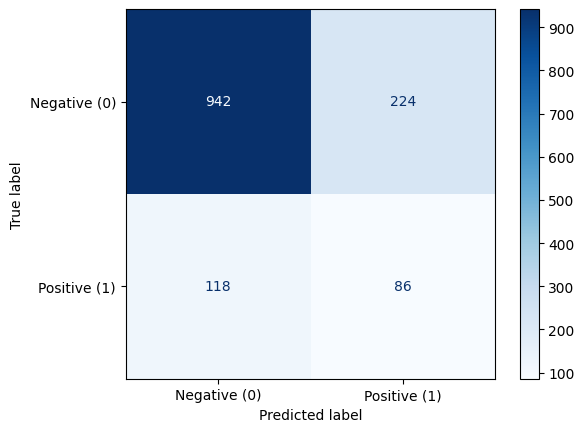

In [40]:
class_labels = ['Negative (0)', 'Positive (1)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1166
           1       0.28      0.42      0.33       204

    accuracy                           0.75      1370
   macro avg       0.58      0.61      0.59      1370
weighted avg       0.80      0.75      0.77      1370



In [60]:
X = df_model[['artist_popularity', 'artist_followers','prev_release_pop', 'prior_release_mean_pop']]
y = df_model['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print(X_train.shape, X_test.shape)

(5479, 4) (1370, 4)


In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.19782534665191287
12.072512301364432


In [63]:
test_with_pred = df_model.loc[X_test.index]

pred_df = pd.DataFrame(y_pred, index = X_test.index)
pred_df = pd.merge(
    test_with_pred, pred_df,
    left_on = test_with_pred.index,
    right_on= pred_df.index,
)
pred_df.rename(columns={
    0 : 'pred_pop'
}, inplace=True)

pred_df.drop(columns='key_0', inplace=True)
pred_df.head()

,apple_track_id,apple_artist_id,track_name,artist_name,genre,country,release_date,release_year,release_month,release_ym,...,rhythm_strength,artist_followers,artist_popularity,artist_genres,artist_image_url,track_age_days,prev_release_pop,prior_release_mean_pop,is_hit,pred_pop
0,26243480,165340,Siberian Sleigh Ride (Instrumental),Trans-Siberian Orchestra,Holiday,USA,2004-10-12 12:00:00+00:00,2004,10,2004-10,...,1.215639,412885.0,69.0,['christmas'],https://i.scdn.co/image/ab6761610000e5eb0b8b46...,7767,63.0,63.00,0,50.926442
1,600946357,420368335,Domo23,"Tyler, The Creator",Rap,USA,2013-02-14 08:00:00+00:00,2013,2,2013-02,...,1.811213,25492387.0,88.0,[],https://i.scdn.co/image/ab6761610000e5ebdf2728...,4720,49.0,53.50,0,54.376964
2,669854845,799597,Blue Christmas,Michael Bublé,Holiday,USA,2011-10-14 07:00:00+00:00,2011,10,2011-10,...,1.228647,7037780.0,87.0,['christmas'],https://i.scdn.co/image/ab6761610000e5ebecf79f...,5209,40.0,46.25,0,51.042132
3,72792935,146311,When It's Over,Sugar Ray,Rock,USA,2001-05-15 07:00:00+00:00,2001,5,2001-05,...,1.380344,1069697.0,63.0,[],https://i.scdn.co/image/ab6761610000e5ebcebc24...,9013,53.0,53.00,0,45.109660
4,1125281670,403746928,Wreak Havoc,Skylar Grey,Pop,USA,2016-08-04 12:00:00+00:00,2016,8,2016-08,...,1.123159,685564.0,68.0,[],https://i.scdn.co/image/ab6761610000e5ebbda75f...,3453,44.0,44.00,0,43.526602


In [64]:
pred_df.sort_values('pred_pop', ascending=False)

,apple_track_id,apple_artist_id,track_name,artist_name,genre,country,release_date,release_year,release_month,release_ym,...,rhythm_strength,artist_followers,artist_popularity,artist_genres,artist_image_url,track_age_days,prev_release_pop,prior_release_mean_pop,is_hit,pred_pop
1275,1524802194,159260351,epiphany,Taylor Swift,Alternative,USA,2020-07-24 12:00:00+00:00,2020,7,2020-07,...,0.976717,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2003,89.0,80.111111,0,70.477664
163,1524801586,159260351,the last great american dynasty,Taylor Swift,Alternative,USA,2020-07-24 12:00:00+00:00,2020,7,2020-07,...,1.705651,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2003,89.0,80.111111,0,70.477664
129,1524801601,159260351,mirrorball,Taylor Swift,Alternative,USA,2020-07-24 12:00:00+00:00,2020,7,2020-07,...,1.203455,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2003,89.0,80.111111,1,70.477664
1290,1524801587,159260351,exile (feat. Bon Iver),Taylor Swift,Alternative,USA,2020-07-24 12:00:00+00:00,2020,7,2020-07,...,1.113829,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,2003,89.0,80.111111,1,70.477664
966,1544268361,159260351,marjorie,Taylor Swift,Alternative,USA,2020-12-11 12:00:00+00:00,2020,12,2020-12,...,1.281951,149973500.0,100.0,[],https://i.scdn.co/image/ab6761610000e5ebe2e8e7...,1863,82.0,80.300000,0,70.424818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,883909786,112115157,Turn Down For What,Power Music Workout,Fitness & Workout,USA,2014-05-30 00:00:00+00:00,2014,5,2014-05,...,1.257721,72895.0,53.0,[],https://i.scdn.co/image/ab6761610000e5eb74b47c...,4251,14.0,13.666667,0,26.979070
1071,339006495,321920145,Thaïs: Meditation,"Pieter Schoeman, London Philharmonic Orchestra...",Classical,USA,2009-12-01 12:00:00+00:00,2009,12,2009-12,...,0.984086,251272.0,67.0,"['classical', 'opera', 'orchestral']",https://i.scdn.co/image/ab6761610000e5eb68060b...,5891,0.0,0.000000,0,26.838812
196,275502260,178426569,Damaged,Danity Kane,Pop,USA,2008-01-29 08:00:00+00:00,2008,1,2008-01,...,1.576787,663675.0,51.0,[],https://i.scdn.co/image/68125870fdff456e17ad48...,6563,7.0,7.000000,0,23.802661
530,294342529,294342530,Clair de Lune,The APM Orchestra,Soundtrack,USA,2008-11-04 12:00:00+00:00,2008,11,2008-11,...,0.617937,372.0,15.0,[],https://i.scdn.co/image/ab67616d0000b273deff4d...,6283,1.0,1.000000,0,8.876956


In [70]:
top_k = int(len(pred_df) * 0.10)

In [ ]:
top_k = pred_df[:137]
precision_at_10 = len(top_k.loc[top_k['is_hit']==1])/len(top_k) 
print(precision_at_10)

0.10948905109489052


## 5. Notebook Conclusion

### 1. Audio Features Have Almost No Predictive Power
Across all regression attempts using only audio variables (BPM, energy, brightness, noisiness, rhythm strength):

- R² ≈ 0.003 → essentially noise level
- Coefficients unstable and inconsistent
- No meaningful explanatory structure

Even though rhythm showed weak correlation in Notebook 04, once formalized into a predictive model the signal collapsed.


**Interpretation**:
Low-level acoustic features do not drive popularity in any stable or scalable way.
They describe sound, not market success.



### Predicting Popularity vs Predicting Hits

### 1. Audio Features Have Almost No Predictive Power

Across all regression attempts using only audio variables (BPM, energy, brightness, noisiness, rhythm strength):

* R² ≈ 0.003 → essentially noise level
* Coefficients unstable and inconsistent
* No meaningful explanatory structure

Even though rhythm showed weak correlation in Notebook 04, once formalized into a predictive model the signal collapsed.

**Interpretation:**
Low-level acoustic features do not drive popularity in any stable or scalable way.
They describe sound, not market success.


### 2. Artist Momentum Explains Popularity (Continuously)

Using:

* Artist popularity
* Artist followers
* Previous release popularity
* Mean popularity of prior releases

Regression improved substantially:

| Model               | R²    | MAE    |
| ------------------- | ----- | ------ |
| Artist only         | ~0.10 | ~13.3  |
| Artist + Prior Mean | ~0.19 | ~12.07 |

After standardization, prior mean popularity dominated alongside artist popularity.

This reveals a **momentum reinforcement structure**:

* Artists with historically popular tracks continue producing moderately popular tracks
* Success compounds over time
* Popularity behaves like an accumulation process

This aligns with a **Matthew Effect** dynamic — prior visibility predicts future visibility.


### 3. Short-Term vs Long-Term Momentum

Comparing:

* Immediate previous release vs
* Mean of prior releases

The model leaned much more heavily on the long-term mean than single prior tracks.

**Meaning:**
Popularity is path-dependent, but not fragile to one song.
It’s cumulative reputation, not just last-hit carryover.


### 4. Hit Prediction Failed — and That Matters

When converting popularity into a binary "hit":

* Logistic regression performed poorly
* Recall and precision for hits extremely low
* Precision@Top10% < baseline hit rate

The model confidently selected non-hits.

**Critical insight:**

* Momentum explains gradual popularity shifts
* Hits are discontinuous events
* Hit success likely driven by external shocks (playlisting, virality, timing, promotion) not captured in features

Popularity = predictable drift
Hits = unpredictable spikes

This distinction is one of the most important structural findings in the entire project.

## 🔍 Final Takeaway from Notebook 05

1. Audio ≠ Success
2. Artist history strongly predicts average future popularity
3. Popularity behaves like cumulative advantage
4. Hit songs cannot be predicted from internal features alone


> Market success in music is structural and reputational, not acoustic.